In [ ]:
!pip3 install requests-html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.2 MB/s 
     |████████████████████████████████| 112 kB 36.8 MB/s 
     |████████████████████████████████| 138 kB 36.0 MB/s 
     |████████████████████████████████| 127 kB 21.1 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=aa15ea5bc5baa4af58fae8d43c7713b16e3787a0d36c1c98f33c364f20f645bc
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=93dcbc071ced941d4076e94b72d8b6e9ae185cdb088a0c73c484f4c26a64b4a6
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
Successfully built fake-useragent parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urll

In [ ]:
from requests_html import HTMLSession
from bs4 import BeautifulSoup

In [ ]:
s = HTMLSession()

# **url do site da Amazon com o item do Search (dslr camera neste caso)**

In [ ]:
url = "https://www.amazon.com.br/s?k=dslr+camera&qid=1654130575&ref=sr_pg_1"

In [ ]:
def getdata(url):
    r = s.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
BeautifulSoup(s.get(url).text, 'html.parser')

<!DOCTYPE doctype html>
<html><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><title>Amazon.com.br Algo deu errado</title><style>html,body{padding:0;margin:0}img{border:0}#a,#b{background:#232f3e;padding:11px;height:35px}#c{position:absolute;left:22px;top:12px}#e{position:relative;max-width:800px;padding:0 40px 0 171px}#f,#g{height:35px;border:0;font-size:1em}#f{width:100%;margin:0;padding:0 10px;border-radius:4px 0 0 4px}#g{cursor:pointer;background:#febd69;font-weight:bold;border-radius:0 4px 4px 0;-webkit-appearance:none;position:absolute;top:0;right:0;padding:0 12px}@media(max-width:500px){#e{padding-left:0}#b{padding:55px 10px 10px}#c{left:6px}}#h{text-align:center;margin:30px 0}#h img{max-width:90%}#d{display:none}#d[src]{display:inline}</style></head><body><form accept-charset="utf-8" action="/s" id="b" method="GET" role="search"><a href="/"><img alt="Amazon.

# Número de páginas do produto do Search

In [ ]:
def getnextpage(soup):
    page = soup.find('span', {'class': 's-pagination-strip'})
    if not page.find('a', {'class': 's-pagination-item s-pagination-next s-pagination-button s-pagination-separator'}):
        # url = "https://www.amazon.com.br" + str(page.find('a', {'class': 's-pagination-item s-pagination-button'})['href'])
        return #url
    else:
        return "https://www.amazon.com.br" + str(page.find('a', {'class': 's-pagination-item s-pagination-next s-pagination-button s-pagination-separator'})['href'])

In [ ]:
# def getproductinfo():

In [ ]:
pages = []

while True:
    soup = getdata(url)
    url = getnextpage(soup)
    if not url:
        break
    pages.append(url)

AttributeError: ignored

In [ ]:
pages

# Nome do primeiro item do produto

In [ ]:
item = soup.find('div', {'data-index': '20'})
# here we find the name of the product
name = item.find('h2', {'class': 'a-size-mini a-spacing-none a-color-base s-line-clamp-4'})
product = name.find('span', {'class': 'a-size-base-plus a-color-base a-text-normal'}).get_text()
product

In [ ]:
# print(getdata(url))

In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Definimos a cidade do buscador:

In [2]:
# Sao Paulo
SP_url = '''https://www.airbnb.com.br/s/Sao-Paulo-~-S%C3%A3o-Paulo--Brazil/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&query=Sao%20Paulo%20-%20S%C3%A3o%20Paulo%2C%20Brazil&place_id=ChIJ0WGkg4FEzpQRrlsz_whLqZs&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click'''

# Rio
RJ_url = '''https://www.airbnb.com.br/s/Rio-de-Janeiro-~-RJ/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click&query=Rio%20de%20Janeiro%20-%20RJ&place_id=ChIJW6AIkVXemwARTtIvZ2xC3FA'''

# Belo Horizonte
BH_url = '''https://www.airbnb.com.br/s/Belo-Horizonte-~-MG/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&query=Belo%20Horizonte%20-%20MG&place_id=ChIJMyzPysqQpgARlznSOl55NVs&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click'''

# Manaus
MA_url = '''https://www.airbnb.com.br/s/Manaus-~-AM/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click&query=Manaus%20-%20AM&place_id=ChIJt0d2s8gbbJIRzKll959cSCs'''

# Goiania
GO_url = '''https://www.airbnb.com.br/s/Goi%C3%A2nia-~-GO/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&date_picker_type=calendar&source=structured_search_input_header&search_type=autocomplete_click&query=Goi%C3%A2nia%20-%20GO&place_id=ChIJZwjYWL32XpMRjmfSIK0rae8'''

# Lista com cada um dos links das paginas do buscador

In [3]:
def create_pages(city_url):
    '''
    this function returns a list with the urls of each page according to the 
    city in (city_url)
    
    input:
    city_url - string with the url of any city defined in the airbnb searcher
    '''
    # empty list to append each page url
    pages = []
    pages.append(city_url)             

    # with this loop we 
    for i in range(1000):
        soup = BeautifulSoup(requests.get(pages[-1]).content, 'html.parser')
        try:
            url = 'https://www.airbnb.com.br' + soup.find('a', '_1bfat5l').get('href')
        except:
            break
        pages.append(url)
        
    return pages

In [4]:
pages_sp = create_pages(SP_url)
pages_rj = create_pages(RJ_url)
pages_bh = create_pages(BH_url)
pages_ma = create_pages(MA_url)
pages_go = create_pages(GO_url)

# Construção de listas com os dados de interesse e do dataframe com os dados da varredura

In [5]:
# scraping dos títulos, camas, precos e avaliacoes de cada uma das acomodações
def create_df(pages):
    '''
    this function returns a dataframe with all the information we extract from the airbnb 
    website
    
    input:
    pages - a list with the urls of each page of the airbnb searcher
    '''
    # we create empty lists to collect the information we want to build the datasets
    titles = []
    links = []
    camas = []
    precos = []
    avaliacoes = []
    
    # iteration through each one of the html code of each page
    for page in pages:
        soup = BeautifulSoup(requests.get(page).content, 'html.parser')
        
        # here we navigate through the tags and classes to collect the information we want
        for i in range(len(soup.find_all('a', 'ln2bl2p dir dir-ltr'))):
            links.append('https://www.airbnb.com.br' + soup.find_all('a', 'ln2bl2p dir dir-ltr')[i].get('href'))
            titles.append(soup.find_all('div', 't1jojoys dir dir-ltr')[i].get_text())
            camas.append(soup.find_all('div', 'f15liw5s s1cjsi4j dir dir-ltr')[i].get_text())
            precos.append(soup.find_all('div', 'p1v28t5c dir dir-ltr')[i].get_text())
            avaliacoes.append(soup.find_all('span', 'ru0q88m dir dir-ltr')[i].get_text())
    
    # construcao do dataframe com os dados da varredura
    df = pd.DataFrame({'titles': titles, 'link': links, 'camas': camas, 'precos': precos, 'avaliacoes': avaliacoes})
    # data cleaning of the prices data using regex to extract just numerical values
    df['precos'] = df['precos'].str.extract('(\d+)')
    # tranforming prices data to numerical values
    df['precos'] = df.precos.astype('float')
    
    return df

# Construção do dataframe com os dados da varredura

In [6]:
df_sp = create_df(pages_sp)
df_rj = create_df(pages_rj)
df_bh = create_df(pages_bh)
df_go = create_df(pages_go)
df_ma = create_df(pages_ma)

In [121]:
df_sp['cidade'] = "São Paulo"
df_rj['cidade'] = "Rio de Janeiro"
df_bh['cidade'] = "Belo Horizonte"
df_go['cidade'] = "Goiania"
df_ma['cidade'] = "Manaus"
# concatenation of the dataframes of each city we collected the data
df = pd.concat([df_sp, df_rj, df_bh, df_go, df_ma], ignore_index=True)

Agora que obtivemos os dados do site, e os organizamos em forma de um Data Frame, podemos usá-los da forma que desejarmos. Aqui, vamos fazer uma análise simples desses dados para exemplificar como podemos usar dados obtidos através do método de Web Scraping. Primeiro, vamos verificar algumas informações iniciais:

In [122]:
pd.set_option("max_rows", None)
df.head()

,titles,link,camas,precos,avaliacoes,cidade
0,Apartamento em São Paulo,https://www.airbnb.com.br/rooms/12167996?adult...,1 cama de casal,135.0,"4,71",São Paulo
1,Apartamento em Jardim Paulista,https://www.airbnb.com.br/rooms/45075705?adult...,7 – 14 de ago.,188.0,"4,75",São Paulo
2,Apartamento em Cerqueira César,https://www.airbnb.com.br/rooms/48733889?adult...,1 cama de casal,198.0,"5,0",São Paulo
3,Apartamento em Pinheiros,https://www.airbnb.com.br/rooms/48300355?adult...,2 – 9 de set.,236.0,"4,92",São Paulo
4,Loft em Pinheiros,https://www.airbnb.com.br/rooms/59641149765946...,1 cama king,211.0,"4,89",São Paulo


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   titles      1500 non-null   object 
 1   link        1500 non-null   object 
 2   camas       1500 non-null   object 
 3   precos      1500 non-null   float64
 4   avaliacoes  1500 non-null   object 
 5   cidade      1500 non-null   object 
dtypes: float64(1), object(5)
memory usage: 82.0+ KB


Através de .head(), pudemos ver que adquirimos com sucesso as informações dos títulos, links, cidades , preços e avaliações dos imóveis. Também observamos, por .info(), que apenas a coluna de preços está como um dado numérico. Seria interessante que a coluna de avaliações também estivesse em formato numérico, então faremos isso em breve. Antes, porém, vamos verificar se existem itens duplicados:

In [123]:
duplicados = df[df.duplicated(keep='first')]
print(duplicados)
df.drop_duplicates(keep='first', inplace=True)
print(duplicados)

Empty DataFrame
Columns: [titles, link, camas, precos, avaliacoes, cidade]
Index: []
Empty DataFrame
Columns: [titles, link, camas, precos, avaliacoes, cidade]
Index: []


Podemos, também, verificar se as colunas possuem algum dado que não é condizente com a coluna. Por exemplo, podemos verificar os tipos de dados de cada categoria presentes na coluna de avaliações:

In [12]:
df['avaliacoes'].value_counts()

5,0     215
Novo    123
4,88     55
4,89     53
4,95     46
       ... 
4,37      1
4,51      1
4,26      1
3,8       1
4,13      1
Name: avaliacoes, Length: 81, dtype: int64

Nesta coluna, esperamos obter apenas os valores das notas de 1 a 5, entretanto, existem 123 instâncias cuja nota está como "Novo". É comum que, para imóveis registrados recentemente no site, a nota seja indicada dessa forma até que hajam avaliações o suficiente para que imóvel possua uma nota que faça sentido. No entanto, para simplificar as nossas análises, vamos excluir estas instâncias sem avaliação numérica. Iremos também converter as informações dessa coluna em dados numéricos, pois, como visto anteriormente, ela está em forma de 'object', não 'float':

In [124]:
print(df.shape)
df = df.loc[df['avaliacoes'] != 'Novo']
df.shape

(1500, 6)


(1377, 6)

In [125]:
df['avaliacoes'] = df['avaliacoes'].str.replace(",", ".").astype(float)
print(df['avaliacoes'])

0       4.71
1       4.75
2       5.00
3       4.92
4       4.89
5       5.00
6       4.89
7       4.88
8       4.80
9       4.77
10      4.96
11      5.00
12      4.85
13      4.96
15      4.70
16      4.95
17      4.87
18      4.82
19      4.99
21      4.89
22      4.82
23      5.00
24      4.99
25      5.00
26      4.97
27      4.77
28      4.97
29      4.84
30      4.96
31      4.70
32      4.95
33      4.83
35      5.00
36      4.98
37      4.83
38      4.61
39      4.79
40      4.62
41      4.71
42      4.90
43      4.78
44      4.62
45      4.87
46      4.38
47      4.72
48      5.00
50      4.83
51      4.95
52      4.83
53      4.76
54      4.96
55      5.00
56      5.00
57      4.86
58      4.92
59      4.76
60      4.85
61      4.99
62      4.92
63      4.74
64      4.96
65      5.00
66      4.79
67      4.92
68      4.88
69      4.34
70      4.88
71      4.93
73      4.80
74      4.90
75      5.00
76      4.71
77      4.93
78      4.74
79      4.50
80      4.73
81      4.80

Agora sim, depois desta breve limpeza, podemos começar a visualizar os dados de forma mais clara. Nosso objetivo é fazer uma comparação simplificada entre os preços e avaliações dos apartamentos em algumas capitais brasileiras. Dessa forma, vamos focar apenas nos atributos de preços, avaliações, e das cidades:

In [126]:
df = df.drop('camas', axis=1)
df = df.drop('link', axis=1)
df = df.drop('titles', axis=1)
df.head()

,precos,avaliacoes,cidade
0,135.0,4.71,São Paulo
1,188.0,4.75,São Paulo
2,198.0,5.00,São Paulo
3,236.0,4.92,São Paulo
4,211.0,4.89,São Paulo


Em seguida, vamos ver a comparação de preços das cinco cidades:

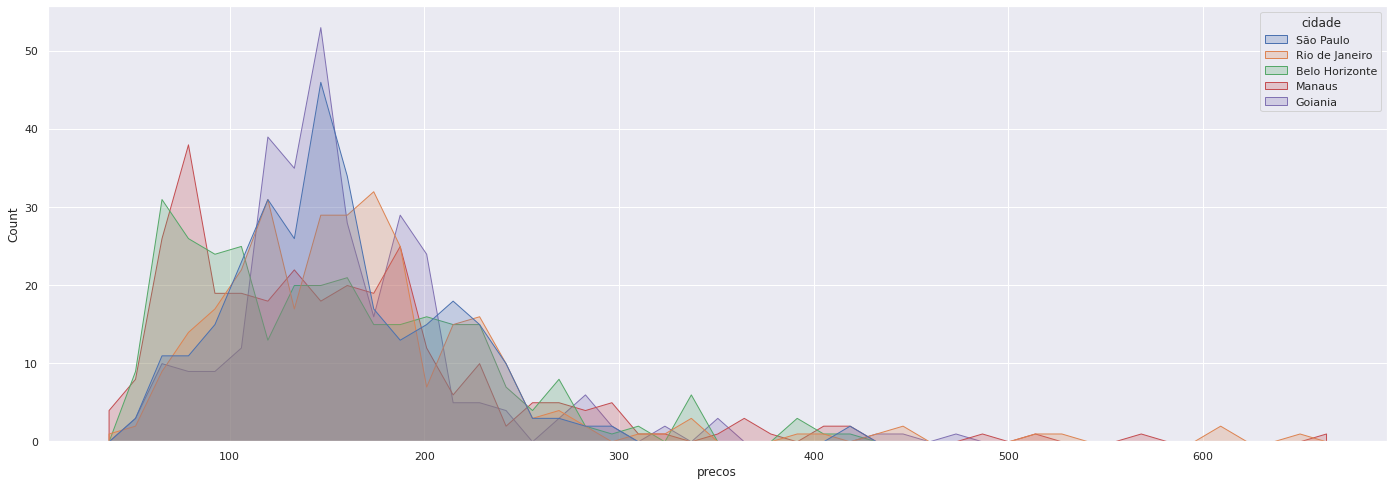

In [34]:
df.reset_index(drop=True)
sns.set(rc={'figure.figsize':(24, 8)})
ax = sns.histplot(data=df, x="precos", hue="cidade", element="poly", discrete=False);
plt.show()

Mas assim está difícil de entender com clareza as diferenças de preços. Podemos tentar visualizar melhor separando os histogramas de cada cidade em um 'ridge plot':

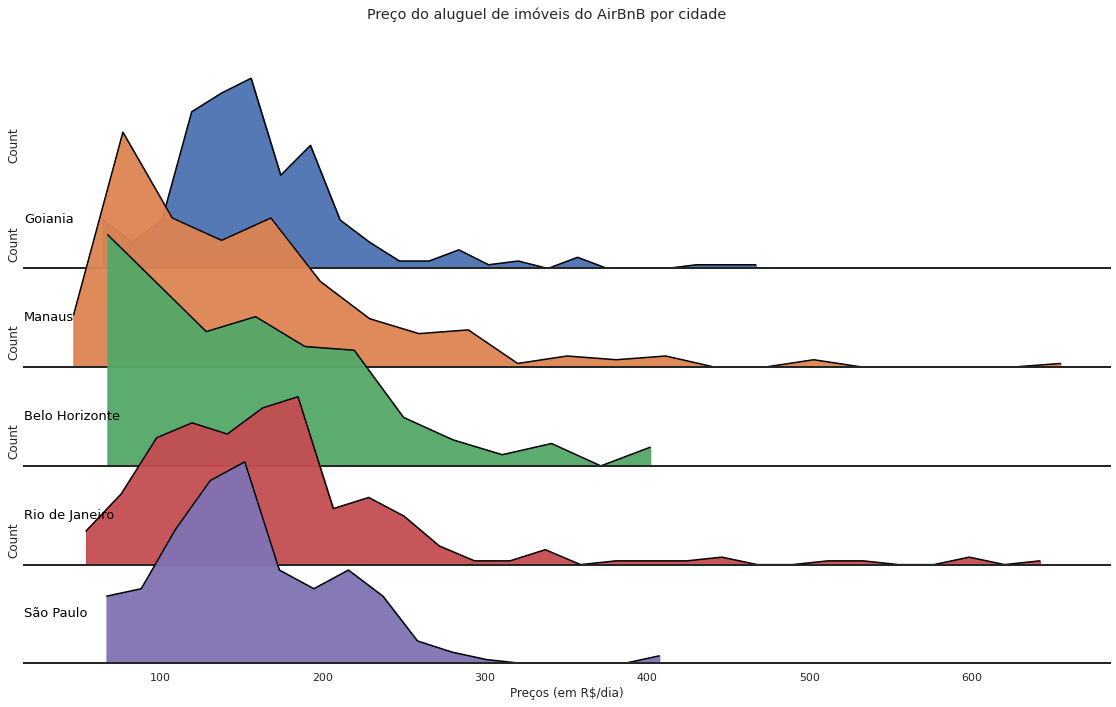

In [177]:
g = sns.FacetGrid(df, row="cidade", hue="cidade", aspect=8, height=2)

palette = sns.color_palette("Set2", 12)
g.map_dataframe(sns.histplot, element="poly", discrete=False, x="precos", palette=palette)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
g.map_dataframe(sns.histplot, element="poly", discrete=False, x="precos", fill=True, alpha=0.8)
g.map_dataframe(sns.histplot, element="poly", discrete=False, x="precos", fill=False, color='black')

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "cidade")
plt.suptitle('Preço do aluguel de imóveis do AirBnB por cidade', y=0.98)
g.fig.subplots_adjust(hspace=-.6)
g.set_titles("")

g.set_titles("")
g.set(yticks=[], xlabel="Preços (em R$/dia)")
g.despine( left=True)


Agora sim, ficou mais clara a diferença entre as cidades. Podemos observar, por exemplo, que Belo Horizonte e Manaus possuem mais imóveis com preços mais baixo do que São Paulo, Goiânia e Rio de Janeiro, e que o Rio é quem mais possui imóveis com um valor de 600 reais a diária. Mas é importante notar que esta comparação somente é válida porque os eixos verticais de cada histograma estão na mesma escala.

Podemos empregar a mesma visualização nas avaliações dos imóveis:

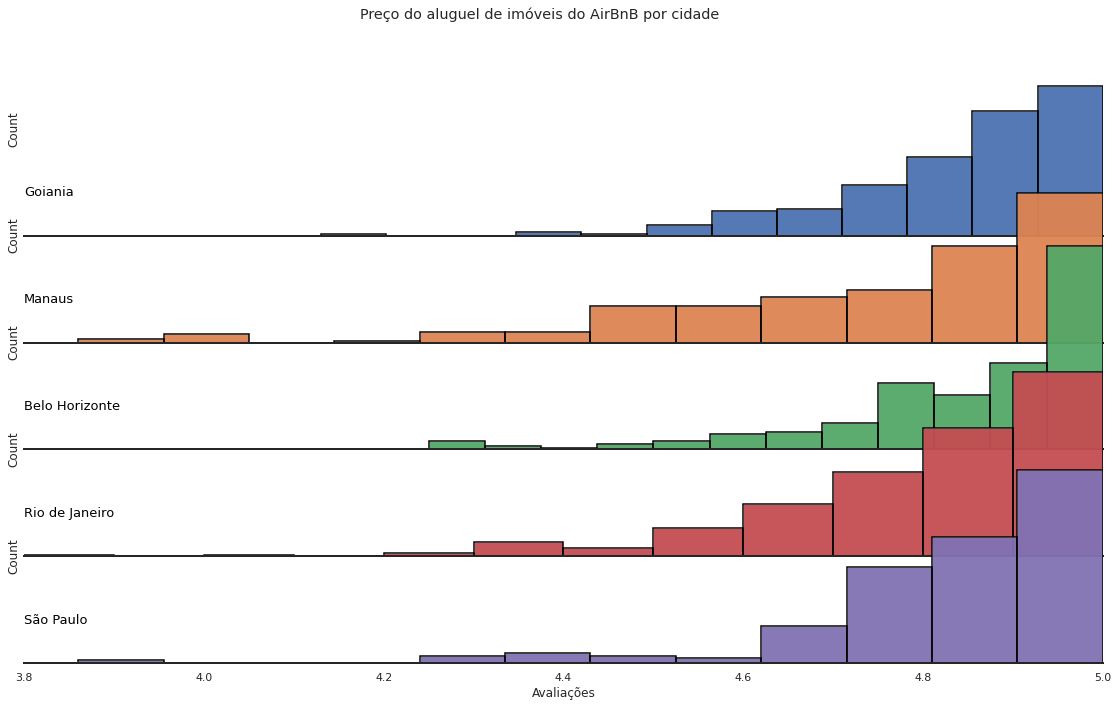

In [164]:
df = df.sort_values(by=['avaliacoes'], ascending=False)

g = sns.FacetGrid(df, row="cidade", hue="cidade", aspect=8, height=2)

palette = sns.color_palette("Set2", 12)
g.map_dataframe(sns.histplot, bins=12, element="bars", discrete=False, x="avaliacoes", palette=palette)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
g.map_dataframe(sns.histplot, bins=12, element="bars", discrete=False, x="avaliacoes", fill=True, alpha=0.8)
g.map_dataframe(sns.histplot, bins=12, element="bars", discrete=False, x="avaliacoes", fill=False, color='black')

def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "cidade")
plt.suptitle('Preço do aluguel de imóveis do AirBnB por cidade', y=0.98)
plt.xlim(3.8, 5.0)
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")

g.set_titles("")
g.set(yticks=[], xlabel="Avaliações")
g.despine(left=True)

Mas desta vez a comparação visual é mais difícil. Talvez se usarmos um 'violin plot', as diferenças entre as avaliações fique mais evidente:

(3.6, 5.0)

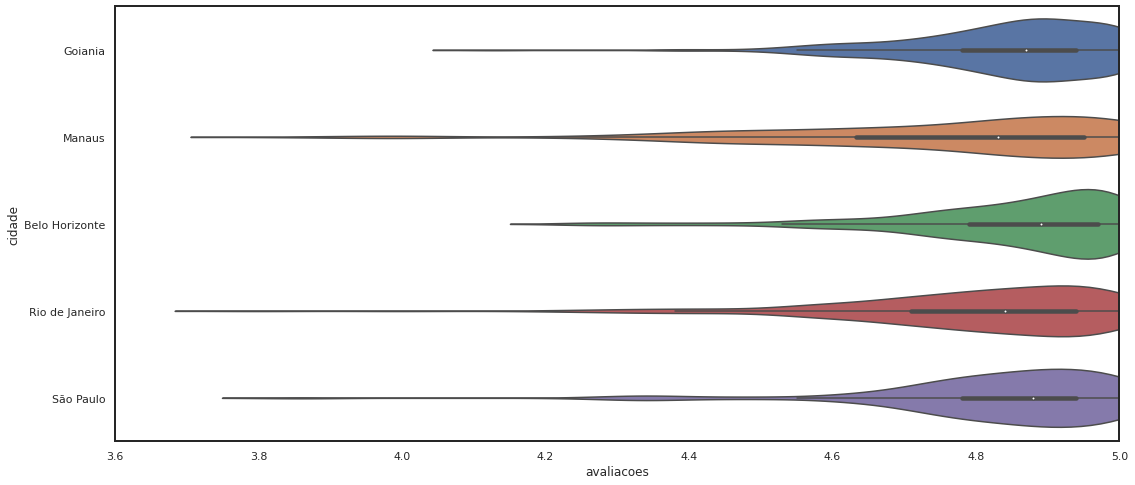

In [176]:
plt.figure(figsize=(18, 8))
sns.violinplot(x='avaliacoes', y='cidade', data=df)
plt.xlim(3.6, 5.0)

Podemos observar que, com relação as avaliações, Belo Horizonte possui uma concentração maior de avaliações próximas de 5.0, e as avaliações de Manaus estão mais diluídas, havendo uma grande quantidade de avaliações desde o 4.9 até o 4.5.

É possível, ainda, comparar estes valores das avaliações com o uso de um 'boxplot':

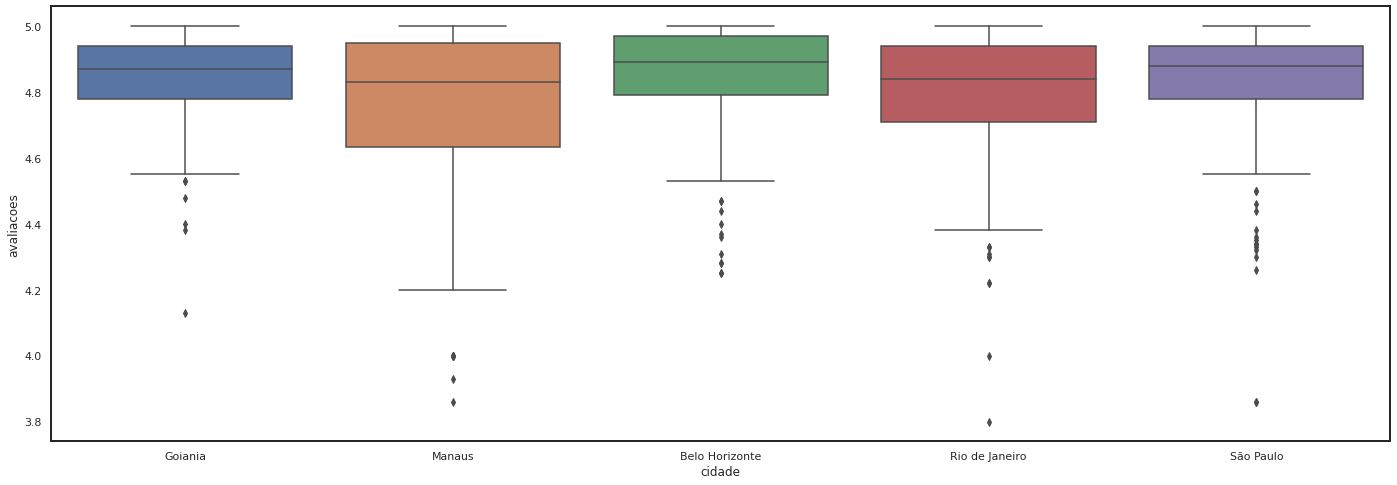

In [178]:
ax = sns.boxplot(x="cidade", y="avaliacoes", data=df)

Desse modo, confirmamos que os valores médios de Belo Horizonte (e também de Goiânia e São Paulo) estão concentrados mais próximos do 4.9 ou 5.0 do que as avaliações de Manaus e do Rio.

Podemos, é claro, analisar esses valores de forma mais objetiva calculando a média de cada cidade, tanto das avaliações quanto dos preços das diárias:

In [185]:
import statistics

df_sp = df.loc[df['cidade'] == 'São Paulo']
df_rj = df.loc[df['cidade'] == 'Rio de Janeiro']
df_bh = df.loc[df['cidade'] == 'Belo Horizonte']
df_ma = df.loc[df['cidade'] == 'Manaus']
df_go = df.loc[df['cidade'] == 'Goiania']

print('Preço médio de São Paulo: ', statistics.mean(df_sp['precos']))
print('Preço médio do Rio de Janeiro: ', statistics.mean(df_rj['precos']))
print('Preço médio de Belo Horizonte: ', statistics.mean(df_bh['precos']))
print('Preço médio de Manaus: ', statistics.mean(df_ma['precos']))
print('Preço médio de Goiania: ', statistics.mean(df_go['precos']))

Preço médio de São Paulo:  155.07220216606498
Preço médio do Rio de Janeiro:  168.55017301038063
Preço médio de Belo Horizonte:  150.99295774647888
Preço médio de Manaus:  150.95736434108528
Preço médio de Goiania:  159.17472118959108


Por fim, observamos então que o Rio de Janeiro é a cidade com o preço médio mais alto, seguida por Goiânia, e que as cidades mais baratas são Manaus e Belo Horizonte (quase empatadas).

In [186]:
print('Avaliação média de São Paulo: ', statistics.mean(df_sp['avaliacoes']))
print('Avaliação média do Rio de Janeiro: ', statistics.mean(df_rj['avaliacoes']))
print('Avaliação média de Belo Horizonte: ', statistics.mean(df_bh['avaliacoes']))
print('Avaliação média de Manaus: ', statistics.mean(df_ma['avaliacoes']))
print('Avaliação média de Goiania: ', statistics.mean(df_go['avaliacoes']))

Avaliação média de São Paulo:  4.833971119133574
Avaliação média do Rio de Janeiro:  4.8022145328719725
Avaliação média de Belo Horizonte:  4.8548943661971835
Avaliação média de Manaus:  4.7624806201550385
Avaliação média de Goiania:  4.847657992565056


E notamos também que as avaliações médias de Belo Horizonte, Goiânia e São Paulo são as mais altas, e que as notas do Rio e de Manaus estão um pouco a baixo (como vimos anteriormente, através do 'violin plot' e do 'box plot').